In [3]:
from pylab import *
#Recuerda que pylab importa numpy como np y pyplot de matplotlib como plt.
%matplotlib inline
#Ajustamos algunos parámetros de estética:
from matplotlib import rc
plt.rc('font', size=22)

## El método de Runge-Kutta de orden cuarto: RK4

Éste es el famoso método de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) escrito en 11 líneas, podríamos reducirlo a 6 en realidad (vale como una tarea reducirlo a seis líneas, dos si se reduce a 5):

In [4]:
def rk4(t0, tf, x0, f, h):
    #Inicializa los arreglos de respuesta:
    #El tiempo es un arreglo de t0 a tf.
    t = np.arange(t0,tf+h,h)
    #La solución se construye con un arreglo del mismo tamaño que el tiempo y
    #luego se introduce la condición inicial.
    x = np.zeros((np.size(t), np.size(x0)))
    x[0] = x0
    
    #Ahora podemos iterar sobre los tiempos en la lista t:
    #Nota que no necesitamos calcular para el útlimo tiempo.
    for (n, tn) in enumerate(t[:-1]):
        #Calcula la solución usando RK4:
        #Nota la sencillez al utilizar los índices de enumerate.
        k1 = f(tn, x[n])
        k2 = f(tn + h/2, x[n] + h*k1/2)
        k3 = f(tn + h/2, x[n] + h*k2/2)
        k4 = f(tn + h, x[n] + h*k3)
        #La solución por RK4 se introduce al array x:
        x[n+1] = x[n] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        
    #Devuelve la solución:
    return t, x

In [11]:
def RK4(f):
    return lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6)( dt * f( t + dt  , y + dy3   ) ))( dt * f( t + dt/2, y + dy2/2 ) ))( dt * f( t + dt/2, y + dy1/2 ) ))( dt * f( t       , y         ) )

Con base en lo anterior resulta trivial generalizar a un Runge-Kutta de mayor orden buscado en la [literatura](http://ac.els-cdn.com/0022247X72900625/1-s2.0-0022247X72900625-main.pdf?_tid=7e72b99c-17f0-11e6-ace6-00000aab0f27&acdnat=1463023416_ecd888ec22580da5edce165a998353f4):

In [5]:
def rk6(t0, tf, x0, f, h):
    #Inicializa los arreglos de respuesta:
    #El tiempo es un arreglo de t0 a tf.
    t = np.arange(t0,tf+h,h)
    #La solución se construye con un arreglo del mismo tamaño que el tiempo y
    #luego se introduce la condición inicial.
    x = np.zeros((np.size(t), np.size(x0)))
    x[0] = x0
    
    #Ahora podemos iterar sobre los tiempos en la lista t:
    #Nota que no necesitamos calcular para el útlimo tiempo.
    for (n, tn) in enumerate(t[:-1]):
        #Calcula la solución usando RK4:
        #Nota la sencillez al utilizar los índices de enumerate.
        k0 = f(tn, x[n])
        k1 = f(tn + h/9.0, x[n] + k0/9.0)
        k2 = f(tn + h/6.0, x[n] + (k0 + 3.0*k1)/24.0)
        k3 = f(tn + h/3.0, x[n] + (k0 - 3.0*k1 + 4.0*k2)/6.0)
        k4 = f(tn + h/2.0, x[n] + (k0 + 3.0*k3)/8.0)
        k5 = f(tn + 2.0*h/3.0, x[n] + (-4.0*k0 - 21.0*k1 + 46.0*k2 - 29.0*k3 + 10.0*k4)/3.0)
        k6 = f(tn + 5.0*h/6.0, x[n] + (-8.0*k0 + 99.0*k1 - 84.0*k2 + 44.0*k4 + 9.0*k5)/72.0)
        k7 = f(tn + h, x[n] + (107.0*k0 - 243.0*k1 + 354.0*k3 - 172.0*k4 - 36.0*k5 + 72.0*k6)/82.0)
        #La solución por RK4 se introduce al array x:
        x[n+1] = x[n] + h*(41.0*(k0 + k7) + 216.0*(k2 + k6) + 27.0*(k3 + k5) + 272.0*k4)/840.0
        
    #Devuelve la solución:
    return t, x

###  Las ecuaciones de Lorenz

Sistema **no-lineal** acoplado en las tres variables $x,y,z$ con parámetros  $r,\sigma, b$:

$$\begin{align}
&\dot{x} = \sigma (y-x)\\
&\dot{y} = r\,x - y -x\,z\\
&\dot{z} = x\,y - b\,z
\end{align}$$

La magia de la  sencillez de cómo definimos RK4 se basa en que podamos expresar de forma correcta la función derivada.

In [6]:
def lorenz(t, v, r = 28.0, sigma = 10.0, b =8.0/3):
    l = np.zeros_like(v)
    l[0] = sigma*(v[1]-v[0])
    l[1] = r*v[0] - v[1] - v[0]*v[2]
    l[2] = v[0]*v[1] - b*v[2]
    return l

La sencillez también entra en cómo definimos nuestras condiciones iniciales dentro de un arreglo de `numpy`. Después todo se junta fácilmente:

In [7]:
t, v = rk4(0.0, 100.0, np.array([0.1, 0.1, 0.1]), lorenz, 1e-3);

In [8]:
v

array([[ 0.1       ,  0.1       ,  0.1       ],
       [ 0.1000134 ,  0.10268879,  0.09974381],
       [ 0.10005341,  0.10537567,  0.09948857],
       ...,
       [10.37398903, 13.88215118, 24.70901176],
       [10.40899559, 13.90205036, 24.7873772 ],
       [10.44384822, 13.92122401, 24.86622197]])

Queremos visualizar nuestro resultado:

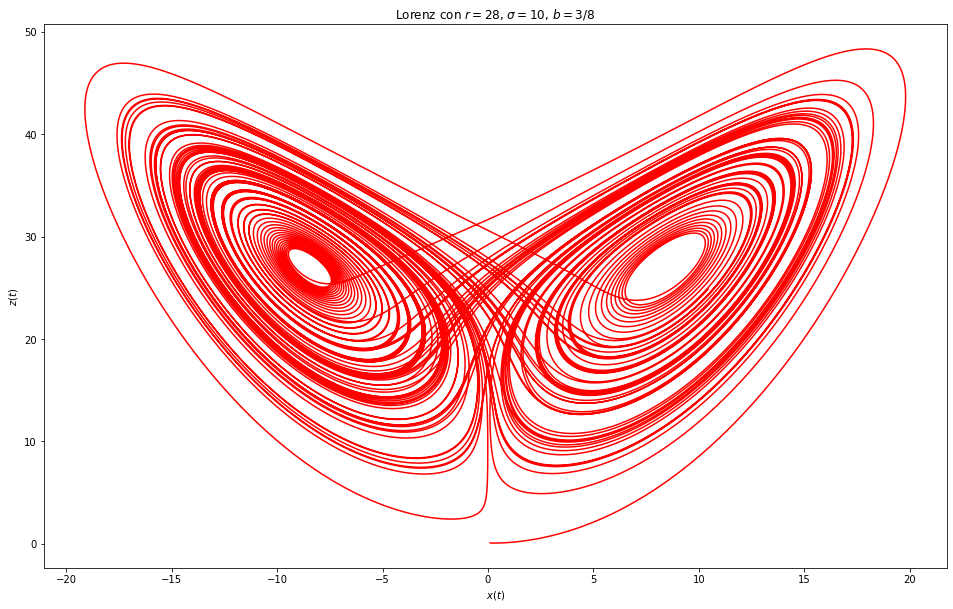

In [8]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Lorenz con $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.plot(v[:,0], v[:,2], "-r")
plt.show()

Esta gráfica anterior presenta un **"atractor extraño"**.

La idea central de las ecuaciones de Lorenz es poder variar los parámetro $r,\sigma, b$. Es entonces muy sencillo definir un integrador `lorenz_rk4` que resuelva el sistema de parámetros variables por RK4:

In [7]:
def lorenz_rk4(t0, tf, h, x0, y0, z0, r = 28.0, sigma = 10.0, b = 8.0/3):
    #Definimos una función derivada con los parámetros deseados:
    def temp_lorenz(t, v):
        l = np.zeros_like(v)
        l[0] = sigma*(v[1]-v[0])
        l[1] = r*v[0] - v[1] - v[0]*v[2]
        l[2] = v[0]*v[1] - b*v[2]
        return l
    #Usando esta función con los parámetros correctos, hacemos RK4.
    t, v = rk4(t0, tf, np.array([x0, y0, z0]), temp_lorenz, h)
    return t, v

Así es muy sencillo variar los parámetros y graficarlos:

Para $1<r<24.06$ se encuentran puntos fijos estables:

In [8]:
#Nota el uso de argumentos default:
t, v = lorenz_rk4(0.0, 100.0, 1e-3, 0.1, 0.1, 0.1, 22.0)

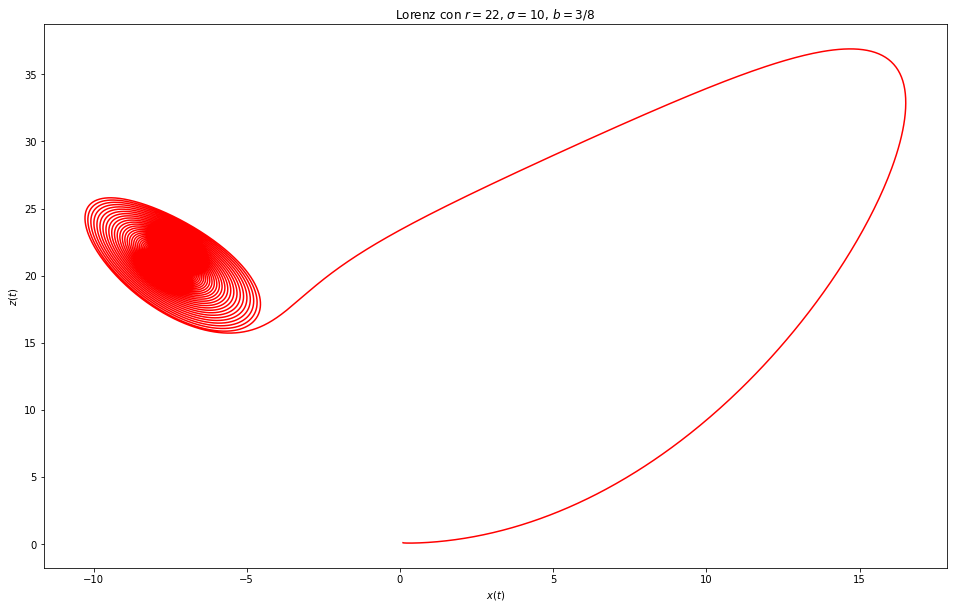

In [9]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Lorenz con $r = 22$, $ \sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.plot(v[:,0], v[:,2], "-r")
plt.show()

Para $r<1$ todas las soluciones tienden rápidamente al origen como punto fijo estable:

In [10]:
t, v = lorenz_rk4(0.0, 100.0, 1e-3, 0.1, 0.1, 0.1, 0.5)

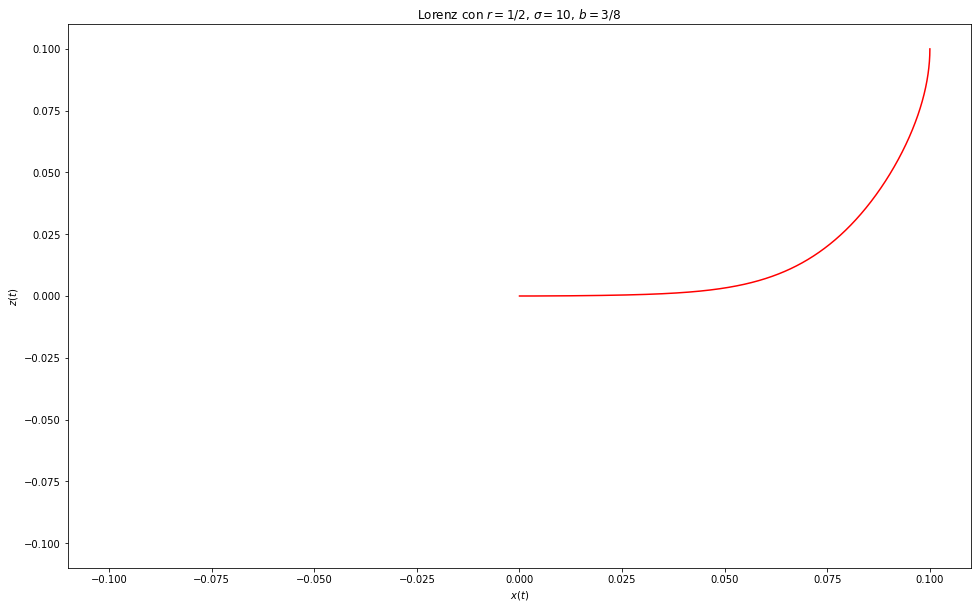

In [11]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Lorenz con $r = 1/2$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.set_xlim(-0.11,0.11)
ax.set_ylim(-0.11,0.11)
ax.plot(v[:,0], v[:,2], "-r")
plt.show()

### Comportamiento caótico

El caos se observa cuando dos sistemas con condiciones iniciales muy semejantes entre sí evolucionan de acuerdo a un conjunto de ecuaciones diferenciales y después de un corto tiempo, los sistemas han perdido toda cercanía.

Vamos a evaluar las ecuaciones de Lorenz para dos sistemas que difieren en condición inicial por `1e-9` y vamos a graficar su separación a cada tiempo.

In [12]:
t1, v1 = lorenz_rk4(0.0, 100.0, 1e-3, 0.1, 0.1, 0.1, 28.0)
t2, v2 = lorenz_rk4(0.0, 100.0, 1e-3, 0.1, 0.1 + 1e-9, 0.1, 28.0)

In [13]:
delta = v1 - v2
d = np.sqrt(delta[:,0]**2 + delta[:,1]**2 + delta[:,2]**2)
ld = np.log(d)

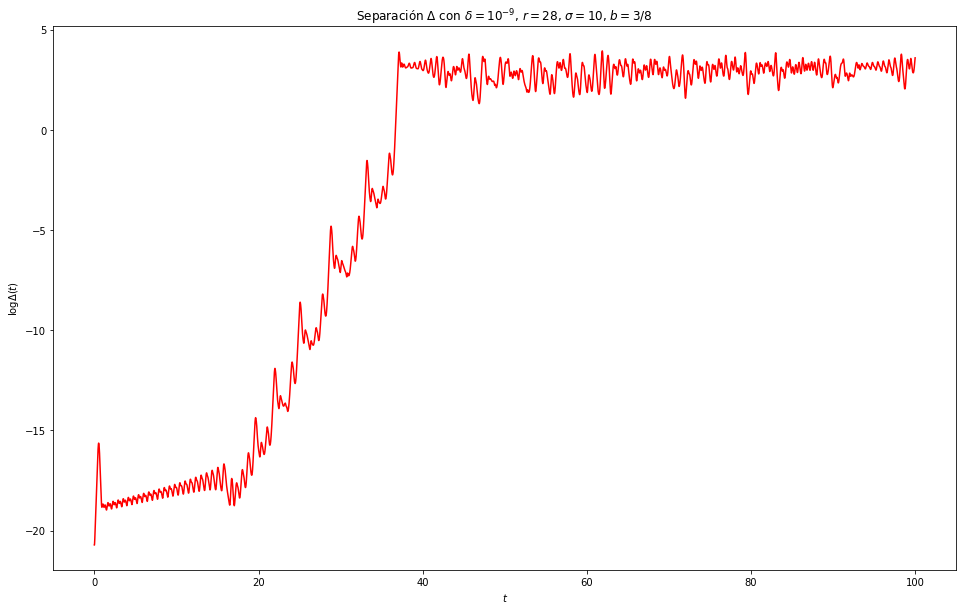

In [14]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Separación $\Delta$ con $\delta = 10^{-9}$, $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_ylabel(r"$\log \Delta(t)$")
ax.set_xlabel(r"$t$")
ax.plot(t1, ld, "-r")
plt.show()

La primera parte de la gráfica todavía tiene efectos transitivos y en la última parte se tiene una saturación. Nos interesa la parte "recta" correspondiente a $t\in [ 20, 40]$ aproximadamente. A esta parte le ajustamos una recta:

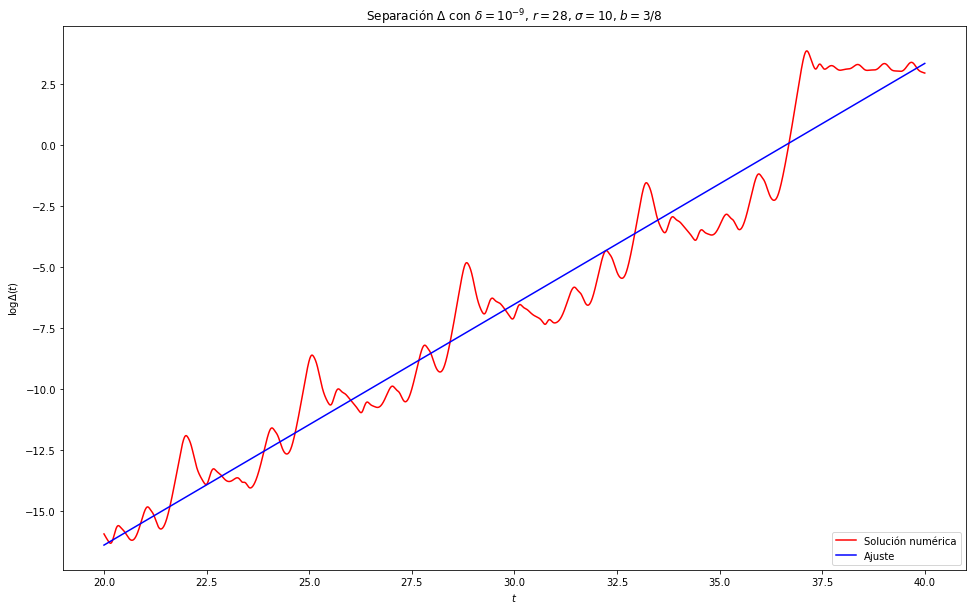

In [15]:
data_x = t1[(20.0 < t1) * (t1 < 40.0)]
data_y = ld[(20.0 < t1) * (t1 < 40.0)]
x_mean = np.mean(data_x)
y_mean = np.mean(data_y)
m = np.sum((data_x  - x_mean)*(data_y - y_mean))/np.sum((data_x-x_mean)**2)
b = y_mean - m*x_mean
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Separación $\Delta$ con $\delta = 10^{-9}$, $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_ylabel(r"$\log \Delta(t)$")
ax.set_xlabel(r"$t$")
ax.plot(data_x, data_y, "-r", label = u"Solución numérica")
ax.plot(data_x, m*data_x + b, "-b", label = u"Ajuste")
ax.legend(loc = 4)
plt.show()

In [16]:
m

0.9882295381987567

Esta pendiente se conoce como el **exponente de Liapunov $\lambda$**. Es una propiedad fundamental para sistemas caóticos, es positiva y lo que nos dice es que

$$\Delta = \delta e^{\lambda\, t}$$

Es decir, la separación entre dos sistemas aumenta de manera exponencial.

### Mapa de Lorenz

Regresemos al atractor extraño y ahora grafiquemos el máximo de $z$ vs. $t$:

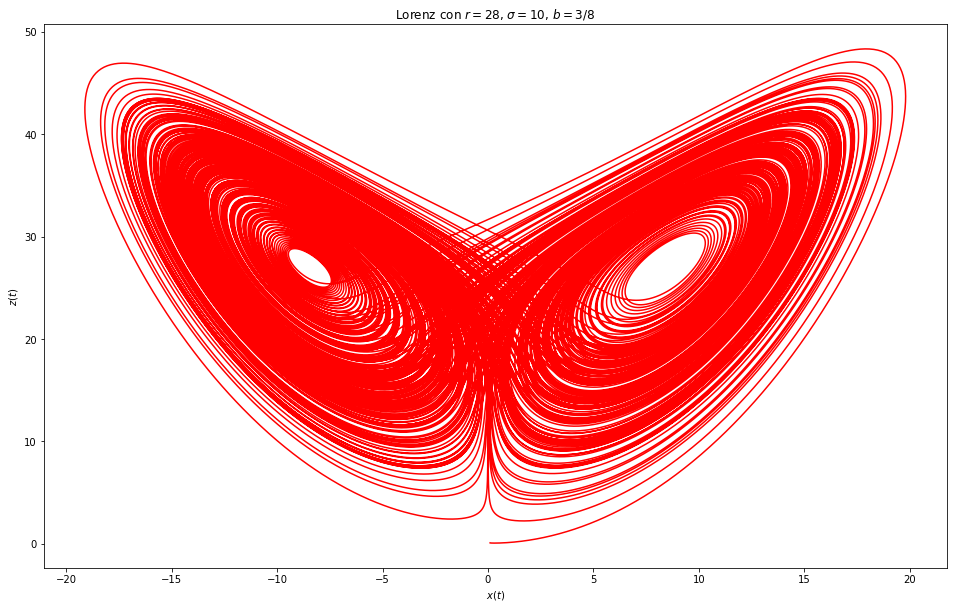

In [17]:
t, v = lorenz_rk4(0.0, 300.0, 1e-3, 0.1, 0.1, 0.1, 28.0)
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Lorenz con $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$z(t)$")
ax.plot(v[:,0], v[:,2], "-r")
plt.show()

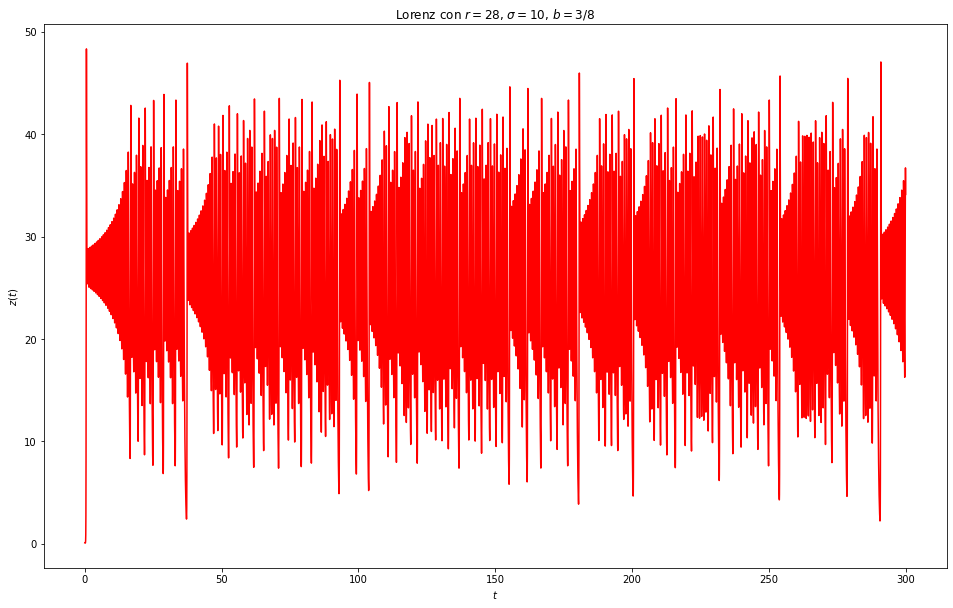

In [18]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Lorenz con $r = 28$, $\sigma = 10$, $b = 3/8$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$z(t)$")
ax.plot(t, v[:,2], "-r")
plt.show()

La idea es ver que hay una serie de $n$ máximos. Queremos ver si el máximo $z_n$ predice al $z_{n+1}$. Primero hay que encontrar dicho conjunto de máximos.

In [19]:
z_peaks = []
n = []
t_max = []
#Elimina efectos transitivos del principio:
time = t[(5 < t)]
z = v[:,2][(5 < t)]
z = v[:,2]
#Ahora encuentra los máximos:
start = 0
count = 0
for i in range(1,z.size-2):
    if z[i]<z[i+1]>z[i+2]:
        zi=z[i+1]
        count+=1
        z_peaks.append(zi)
        

In [20]:
count

406

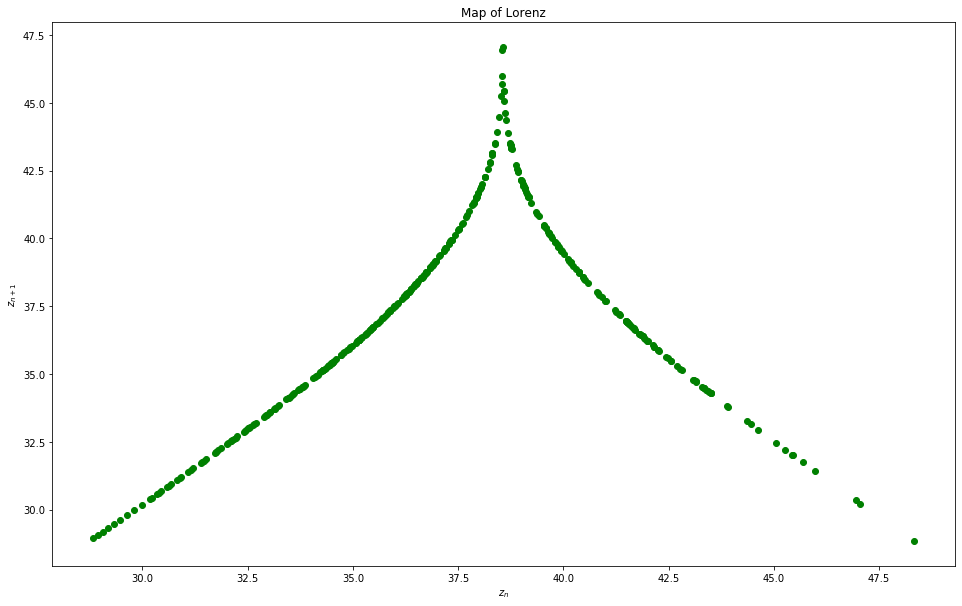

In [22]:
fig, ax = plt.subplots(figsize = (16.18,10))
ax.set_title(r"Map of Lorenz")
ax.set_xlabel(r"$z_n$")
ax.set_ylabel(r"$z_{n+1}$")
ax.plot(z_peaks[:-1], z_peaks[1:],'go')
plt.show()

In [18]:
def RK4(f):
    return lambda t, y, dt: (lambda dy1: (lambda dy2: (lambda dy3: (lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6 )( dt * f( t + dt  , y + dy3   ) ))( dt * f( t + dt/2, y + dy2/2 ) ))( dt * f( t + dt/2, y + dy1/2 ) ) )( dt * f( t       , y         ) )
 
def theory(t): 
    return (t**2 + 4)**2 /16
 
from math import sqrt
dy = RK4(lambda t, y: t*sqrt(y))
 
t, y, dt = 0., 1., .1
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
        t, y = t + dt, y + dy( t, y, dt )
 

y(0.0)	= 1.000000 	 error:    0


KeyboardInterrupt: 